<a href="https://colab.research.google.com/github/GopuMahidar/ml1/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing packages
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_Churn_Prediction.csv')
df.head()

,Customer_ID,Age,Gender,Tenure,Monthly_Spend,Plan_Type,Has_Support_Tickets,Customer_Satisfaction,Contract_Length,Churn,Referral_Source
0,3ffeed1c-8b64-48e0-8aad-6bb869b2c6d8,44,Female,3,NaN,Standard,True,1.210574,24,0,Friend
1,410429e9-40fb-4428-9af2-74ffb23bdfc9,18,Female,4,389.459999,Premium,False,4.737401,36,0,Friend
2,53fa6e96-592a-49b1-9b04-c51ada42331c,18,Male,8,68.863401,Standard,True,1.803626,12,0,Direct
3,4b1e9608-cb59-46a9-b33c-4a342865a2cb,18,Male,4,425.589200,Standard,True,1.218204,24,1,Direct
4,d1d8825b-df2f-4588-9272-1acd986dbe10,61,Female,8,371.658888,Basic,False,1.046686,24,1,Friend


In [4]:
# See the no. of rows and columns
df.shape

(1000, 11)

In [5]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Gender', 'Tenure', 'Monthly_Spend', 'Plan_Type', 'Has_Support_Tickets', 'Customer_Satisfaction', 'Contract_Length', 'Churn', 'Referral_Source']


In [6]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Gender,object
Tenure,int64
Monthly_Spend,float64
Plan_Type,object
Has_Support_Tickets,object
Customer_Satisfaction,float64
Contract_Length,int64
Churn,int64


In [7]:
df.describe()

,Age,Tenure,Monthly_Spend,Customer_Satisfaction,Contract_Length,Churn
count,1000.000000,1000.000000,882.000000,884.000000,1000.000000,1000.000000
mean,43.532000,5.091000,260.157686,2.999722,23.604000,0.467000
std,14.853336,2.531626,138.897864,1.182274,9.855979,0.499159
min,18.000000,1.000000,22.121191,1.003375,12.000000,0.000000
25%,31.000000,3.000000,139.285604,1.974122,12.000000,0.000000
50%,43.000000,5.000000,259.698381,2.986382,24.000000,0.000000
75%,56.000000,7.000000,385.592991,4.068957,36.000000,1.000000
max,69.000000,9.000000,499.248646,4.999298,36.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Tenure                 1000 non-null   int64  
 4   Monthly_Spend          882 non-null    float64
 5   Plan_Type              1000 non-null   object 
 6   Has_Support_Tickets    927 non-null    object 
 7   Customer_Satisfaction  884 non-null    float64
 8   Contract_Length        1000 non-null   int64  
 9   Churn                  1000 non-null   int64  
 10  Referral_Source        1000 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [9]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Tenure,0
Monthly_Spend,118
Plan_Type,0
Has_Support_Tickets,73
Customer_Satisfaction,116
Contract_Length,0
Churn,0


In [10]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove

In [12]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Gender', 'Plan_Type', 'Has_Support_Tickets', 'Referral_Source'], dtype='object')

In [13]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

<ipython-input-13-61090ff7a91d>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns


In [18]:
# fill the missing values for numerical terms - mean
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].fillna(df['Customer_Satisfaction'].mean())
df['Monthly_Spend'] = df['Monthly_Spend'].fillna(df['Monthly_Spend'].mean())

In [19]:
# fill the missing values for categorical terms - mode
df['Has_Support_Tickets'] = df["Has_Support_Tickets"].fillna(df['Has_Support_Tickets'].mode()[0])

In [25]:
# find the null values
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Monthly_Spend,0
Plan_Type,0
Has_Support_Tickets,0
Customer_Satisfaction,0
Contract_Length,0
Churn,0
Referral_Source,0


In [26]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [23]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Churn', axis=1)  # -- independent variable
y = df['Churn'] # -- dependent variable

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [30]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.565
Logistic Regression Confusion Matrix:
 [[92 15]
 [72 21]]


In [39]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [41]:
print("Random Forest Accuracy:", rf_accuracy*100)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 53.5
Random Forest Confusion Matrix:
 [[68 39]
 [54 39]]


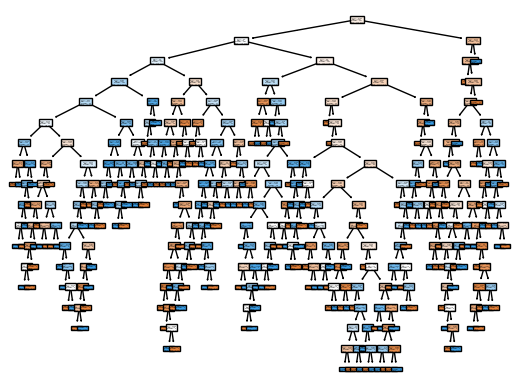

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [44]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [46]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
